In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


Parent mean = 67.69 inches
Offspring mean = 68.69 inches
Intercept = 34.06
Slope = 0.512


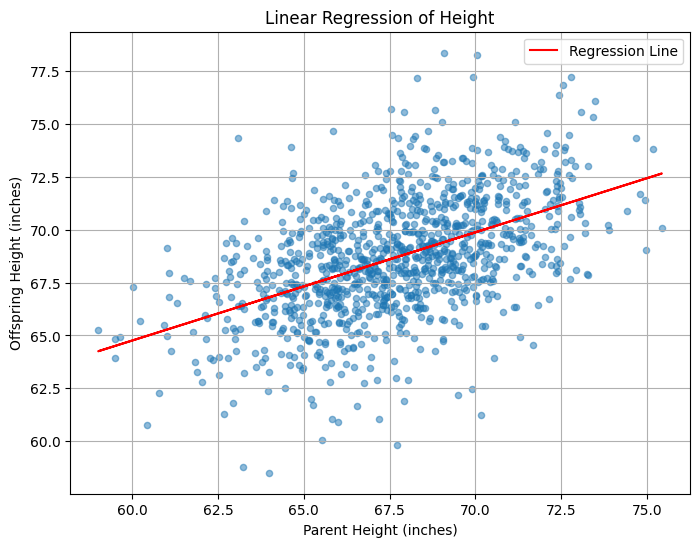

In [99]:
# Load data
df = pd.read_csv("par_off.csv")

# Divide the columns into parent and offspring heights (first column = parent, second column = offspring)
parent_heights = df.iloc[:, 0].values.reshape(-1, 1)
offspring_heights = df.iloc[:, 1].values

# Count the means
parent_mean = np.mean(parent_heights)
offspring_mean = np.mean(offspring_heights)

# Fit linear regression model
model = LinearRegression()
model.fit(parent_heights, offspring_heights)

# Take the intercept and slope values
intercept = model.intercept_
slope = model.coef_[0]

# Print the results
print(f"Parent mean = {parent_mean:.2f} inches")
print(f"Offspring mean = {offspring_mean:.2f} inches")
print(f"Intercept = {intercept:.2f}")
print(f"Slope = {slope:.3f}")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(parent_heights, offspring_heights, alpha=0.5, s=20)
plt.plot(parent_heights, model.predict(parent_heights), color='red', label='Regression Line')
plt.xlabel('Parent Height (inches)')
plt.ylabel('Offspring Height (inches)')
plt.title('Linear Regression of Height')
plt.legend()
plt.grid(True)
plt.show()

### Question 1.1 
We can use numpy means to retrieve parent's height and offspring's height means. Using Scikit linear regression function, we can also find the slope and intercept values. From the result we can conclude that the linear regression model equation is: Offspring_height = 0.51 * Parent_height + 34.06. We can also see from the plot visualization, for extreme case of the parents' height, resulted in normal offsprings' height (close to the offspring's mean) and it is indeed conforms Galton and Pearson's observations.

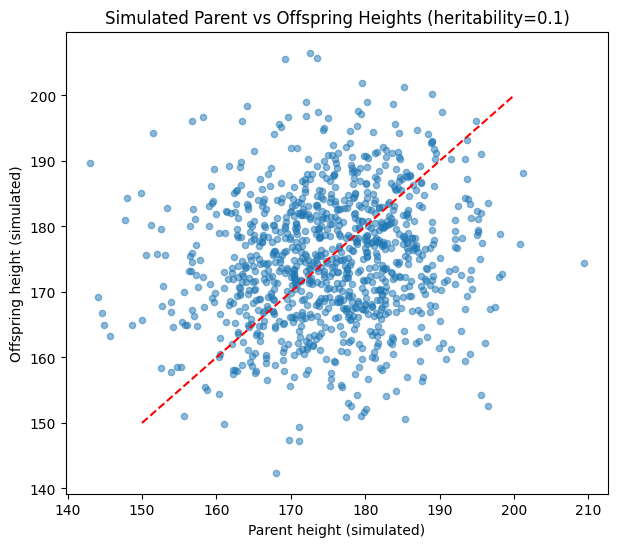

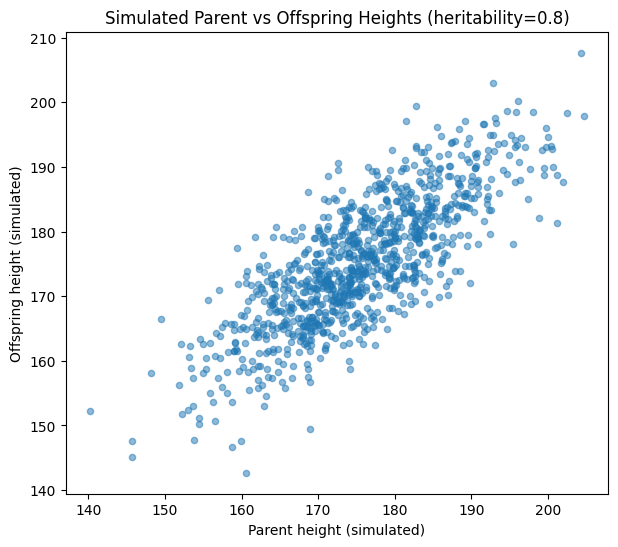

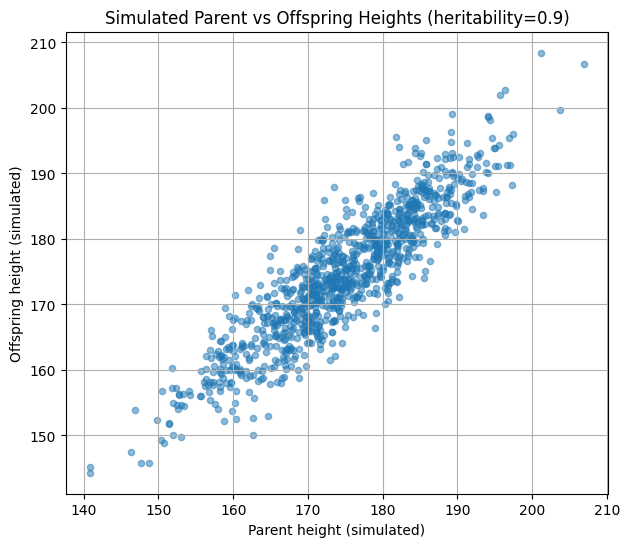

[[178.01808189]
 [173.98769182]
 [170.69654583]
 [174.90827073]
 [170.39222401]
 [173.06926881]
 [174.72384175]
 [170.15341005]
 [176.66677706]
 [170.50362808]
 [168.97167431]
 [174.86224908]
 [178.86912787]
 [174.20247965]
 [179.01610246]
 [177.39683152]
 [171.065541  ]
 [179.16718907]
 [163.68374223]
 [168.36721584]
 [173.55629632]
 [172.08930635]
 [178.89848911]
 [172.67477998]
 [175.60784295]
 [174.03129913]
 [174.01082014]
 [178.0079706 ]
 [174.04213697]
 [172.46965252]
 [176.19610549]
 [177.58012856]
 [170.48403168]
 [169.55312946]
 [177.79944195]
 [176.11172231]
 [175.0679253 ]
 [176.15388358]
 [175.09479313]
 [179.48184587]
 [175.74680515]
 [173.70265095]
 [170.94387829]
 [175.02312014]
 [174.79526776]
 [172.85379168]
 [177.08325462]
 [177.57564635]
 [175.95599462]
 [178.48778458]
 [180.25139572]
 [177.30310511]
 [166.22170376]
 [175.18108492]
 [169.86822059]
 [179.59250626]
 [174.16073537]
 [176.85404393]
 [173.45971168]
 [172.5088227 ]
 [169.67639865]
 [172.60449971]
 [173.66

In [ ]:
def generate_data(mean, var, hrd, n_each, n):
    g = mean + np.sqrt(hrd*var)*np.random.randn(n,1)
    gs = np.tile(g, (1, n_each))
    x = gs + np.sqrt((1-hrd)*var)*np.random.randn(n,n_each)
    return g, x

g0, x0 = generate_data(175, 100, 0.1, 2, 1000)
g1, x1 = generate_data(175, 100, 0.8, 2, 1000)
g2, x2 = generate_data(175, 100, 0.9, 2, 1000)
# mean = height mean
# var = variance value (data spread)
# hrd = heritability (between 0–1), due to genetic factors
# n_each = number of individuals per family (2 = parent & offspring)
# n = number of families (1000 families)



# create the plot based on the result
# make three consecutive plots

plt.figure(figsize=(7,6))
plt.scatter(x0[:,0], x0[:,1], alpha=0.5, s=20)
plt.xlabel("Parent height (simulated)")
plt.ylabel("Offspring height (simulated)")
plt.title("Simulated Parent vs Offspring Heights (heritability=0.1)")
plt.figure(figsize=(7,6))
plt.scatter(x1[:,0], x1[:,1], alpha=0.5, s=20)
plt.xlabel("Parent height (simulated)")
plt.ylabel("Offspring height (simulated)")
plt.title("Simulated Parent vs Offspring Heights (heritability=0.8)")
plt.figure(figsize=(7,6))
plt.scatter(x2[:,0], x2[:,1], alpha=0.5, s=20)
plt.xlabel("Parent height (simulated)")
plt.ylabel("Offspring height (simulated)")
plt.title("Simulated Parent vs Offspring Heights (heritability=0.9)")
plt.grid(True)
plt.show()

print(g0)
print(x0[:,0])


### Question 1.2

I tried experimenting with what I considered to be the most important parts, namely genetic factor (hrd) and variance. 
From the test results, if I reduce the variance value, the data distribution becomes denser. On the other hand, as the variance increases, the data points become more tightly clustered (still, it is not changing the shape of the data point cluster).
I also noticed that when I change the heredity value, if it becomes smaller, the data distribution spreads out widely, whereas at higher g values, the data points form a line that approaches a linear function. The meaning of this shape is: when the heredity value approaches 1.0, the data distribution will form a straight diagonal line, meaning the offsprings' height is tighly related to the height of their parents'. On the other hand, for very low heredity value, the height difference between parents and offspring will be significantly different (more random).

To alter this function for different means of parents and offspring, I have not yet found the appropriate coding. However, my idea is that within the function, we generate data points with two different means as input (mean_parent and mean_offspring). From there, if we plot the data, the distribution will remain similar because we maintain the variance and heredity values. The difference is that the concentration of the data points will shift according to the changes in the mean values of the parents and offspring entered as input.

Parent mean = 175.06 inches
Offspring mean = 190.10 inches


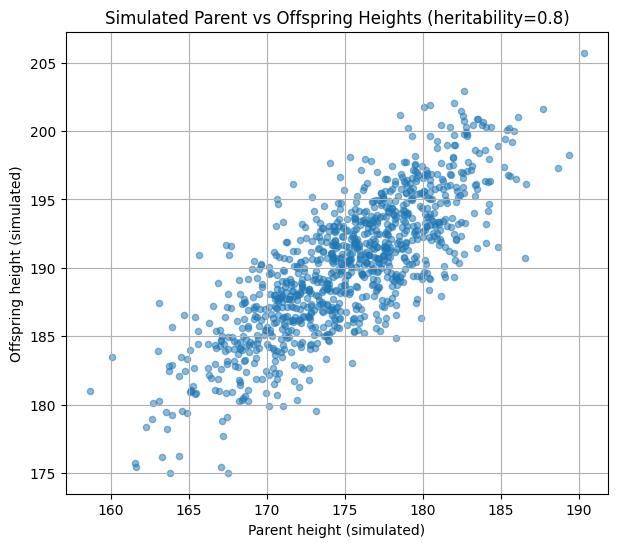

In [117]:
# 1.2 Comparing different heritability values

def generate_data_two_means(mean_parent, mean_offspring, var, hrd, n_each, n):
    # 1) Generate family genetic factor, centered at mean_parent
    g  = mean_parent + np.sqrt(hrd*var) * np.random.randn(n, 1)
    # 2) Duplicate g into two columns (parent & offspring share the same g)
    gs = np.tile(g, (1, n_each))
    # 3) Add individual noise to each column (environmental variance)
    x  = gs + np.sqrt((1-hrd)*var) * np.random.randn(n, n_each)
    # 4) Shift offspring column to have mean equal to mean_offspring
    #    Shift delta = mean_offspring - mean_parent
    x[:, 1] += (mean_offspring - mean_parent)

    return g, x

# Generate data
g, x = generate_data_two_means(175, 190, 25, 0.8, 2, 1000)
#find the mean
mean_parent = g.mean()
mean_offspring = x[:, 1].mean()
print(f"Parent mean = {mean_parent:.2f} inches")
print(f"Offspring mean = {mean_offspring:.2f} inches")

# Scatter plot: parent vs offspring
plt.figure(figsize=(7,6))
plt.scatter(x[:,0], x[:,1], alpha=0.5, s=20)
plt.xlabel("Parent height (simulated)")
plt.ylabel("Offspring height (simulated)") 
plt.title("Simulated Parent vs Offspring Heights (heritability=0.8)")
plt.grid(True)
plt.show()

### 1.3 How are the heritability and the observed regression coefficients related? 

Parent mean = 175.24 inches
Offspring mean = 174.97 inches
Intercept = 35.30
Slope = 0.797


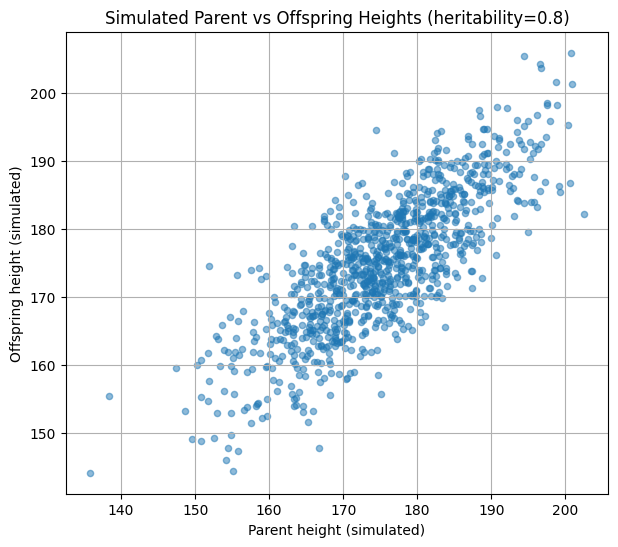

In [119]:
def generate_data(mean, var, hrd, n_each, n):
    g = mean + np.sqrt(hrd*var)*np.random.randn(n,1)
    gs = np.tile(g, (1, n_each))
    x = gs + np.sqrt((1-hrd)*var)*np.random.randn(n,n_each)
    return g, x

g, x = generate_data(175, 100, 0.8, 2, 1000)

# Parent = col 0, Offspring = col 1
parent_heights = x[:, 0]
offspring_heights  = x[:, 1]

# Count the means
parent_mean = np.mean(parent_heights)
offspring_mean = np.mean(offspring_heights)

# Fit linear regression
model = LinearRegression()
model.fit(parent_heights.reshape(-1, 1), offspring_heights) # scikit wants it to reshape using (-1,1)

# Find the intercept and slope
intercept = model.intercept_
slope = model.coef_[0]

# Print the results
print(f"Parent mean = {parent_mean:.2f} inches")
print(f"Offspring mean = {offspring_mean:.2f} inches")
print(f"Intercept = {intercept:.2f}")
print(f"Slope = {slope:.3f}")

# Scatter plot: parent vs offspring
plt.figure(figsize=(7,6))
plt.scatter(x[:,0], x[:,1], alpha=0.5, s=20)
plt.xlabel("Parent height (simulated)")
plt.ylabel("Offspring height (simulated)") 
plt.title("Simulated Parent vs Offspring Heights (heritability=0.8)")
plt.grid(True)
plt.show()


By combining the two codes provided in the previous question, we can see that the coefficient (slope) ≈ heredity. This means that the higher the heredity, the steeper the linear shape will be according to the coefficient value. This was also proven when I tried it with different heredity values, which still produced a coefficient (slope) ≈ heredity.

## Question 1.4 
How does heritability relate to the percentage of variance among offspring values explained by the parent heights? What if you had explicit knowledge the genetic make-up (g)? What percentage of variance can be explained by that?  Should you still take into account the information on parent height in addition?

1. I still do not know about the heritability relation with the percentage of variance among offspring values explained by the parent heights, and also
2. I am still not sure about how genetic make-up related with variance?

### 2. In regularised_polynomial_regression.py, you find some code for ridge regression, closely following our existing code for polynomial regression. 

u =  [[0.20494242]
 [0.33587769]
 [0.83345191]
 [0.15897457]
 [0.70158011]
 [0.75649471]
 [0.45185215]
 [0.73508948]
 [0.16079173]
 [0.14151528]
 [0.59773184]
 [0.1024591 ]
 [0.39487466]
 [0.84001424]
 [0.60451359]
 [0.43845915]
 [0.56224137]
 [0.85356217]
 [0.31429008]
 [0.63398594]
 [0.65599437]
 [0.59063664]
 [0.86537092]
 [0.07959507]
 [0.24255859]
 [0.48432811]
 [0.17245133]
 [0.46996401]
 [0.71618581]
 [0.47572231]
 [0.90566553]
 [0.4459259 ]
 [0.21991173]
 [0.4687982 ]
 [0.94807064]
 [0.30688458]
 [0.46896021]
 [0.06496663]
 [0.30505283]
 [0.71129794]
 [0.513188  ]
 [0.75621241]
 [0.20057909]
 [0.88013485]
 [0.1685238 ]
 [0.10328722]
 [0.70278535]
 [0.46013626]
 [0.69249623]
 [0.56451549]
 [0.78055994]
 [0.02602083]
 [0.19883626]
 [0.71337449]
 [0.18109146]
 [0.98080406]
 [0.22814911]
 [0.61468017]
 [0.14143363]
 [0.89514885]
 [0.28275566]
 [0.64837619]
 [0.4245612 ]
 [0.04833344]
 [0.3990452 ]
 [0.66292275]
 [0.3696219 ]
 [0.83956128]
 [0.17649773]
 [0.46485279]
 [0.96318979]
 

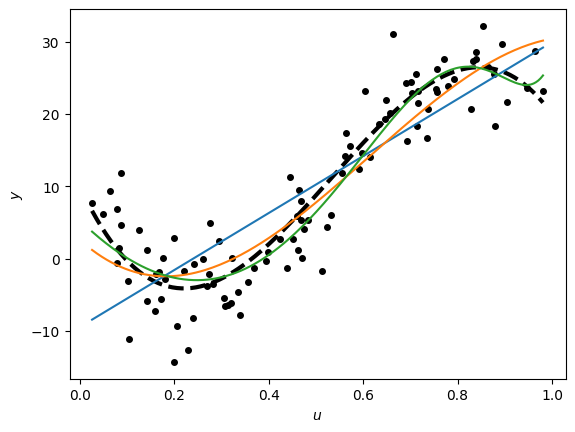

In [122]:
""" polynomial_ridge_regression.py """
import numpy as np
from numpy.linalg import norm , solve
import matplotlib.pyplot as plt
from numpy.random import rand , randn

# Function to generate polynomial data of degree p
def generate_data(p, beta , sig, n):
    u = np.random.rand(n, 1)
    y = (u ** np.arange(0, p+1)) @ beta + sig * np.random.randn(n, 1)
    return u, y

# Parameters for simulation data
beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
# Generate training data with degree 3
u, y = generate_data(3, beta , sig, n)

print("u = ", u)
print("y = ", y)

# Function to build model matrix from u
def model_matrix(p, u):
   X = np.ones((n, 1))
   p_range = np.arange(0, p + 1)    
   for p_current in p_range:
      if p_current > 0:
         X = np.hstack((X, u**(p_current))) 
   return X

# Function to train ridge regression model
def ridge_train(X, y, ngamma):
    RegM = ngamma*np.identity(p + 1)
    betahat = solve(X.T @ X + RegM, X.T @ y)
    return betahat

# Initialize dictionaries to store results
X, betahat = {},{}
gamma = 0.0001;
ps = [1, 3, 15]
# Train the model for each degree
for p in ps:
   X[p] = model_matrix(p, u) 
   betahat[p] = ridge_train(X[p], y, n*gamma)

# Function to test coefficients
def test_coefficients(n, betahat, X, y):
    y_hat = X @ betahat
    loss = (norm(y - y_hat)**2/n)
    return loss

# Generate test data
u_test, y_test = generate_data(3, beta, sig, n)
X_test = {}
training_loss = {}
test_loss = {}
# Calculate loss for training and test data
for p in ps:
     X_test[p] = model_matrix(p, u_test)
     training_loss[p] = test_coefficients(n, betahat[p], X[p], y)
     test_loss[p] = test_coefficients(n, betahat[p], X_test[p], y_test)
     print(f"Degree {p}: Training Loss = {training_loss[p]:.4f}, Test Loss = {test_loss[p]:.4f}")

# Plot the points and true line and store in the list "plots"
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plots = [plt.plot(u, y, 'k.', markersize=8)[0], plt.plot(xx, yy, 'k--',linewidth=3)[0]]

# add the three curves
for i in ps:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])
plt.xlabel(r'$u$')
plt.ylabel(r'$y$')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


## Question 2.1 
From the code that was run, it can be seen that new features were generated from calling the model_matrix function using ps [1, 3, 15], which means that there were 3 model functions trained with 1 degree feature (fixed), 3 degree features (addition of 2 features), and 15 degree features (addition of 14 features). By adding polynomial features, a simple linear model can learn more complex curve shapes. However, if using unregularised polynomial regression, there is a high likelihood of overfitting with high-degree polynomials. On the other hand, with regularised polynomial regression such as ridge, we see that even when using high-degree polynomials, it can still approximate the optimal function without overfitting because there is control over the gamma parameter. (see that from the example, the training loss and test loss for model in degree 15 are better compared to the models with lower degree)

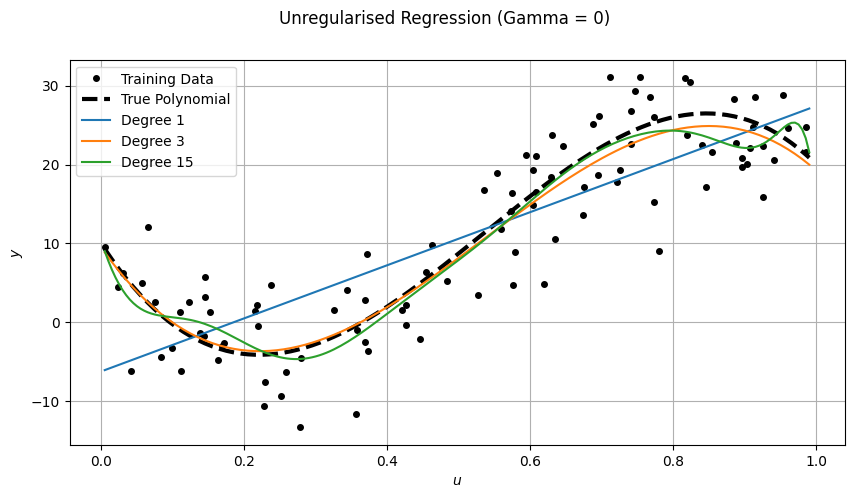

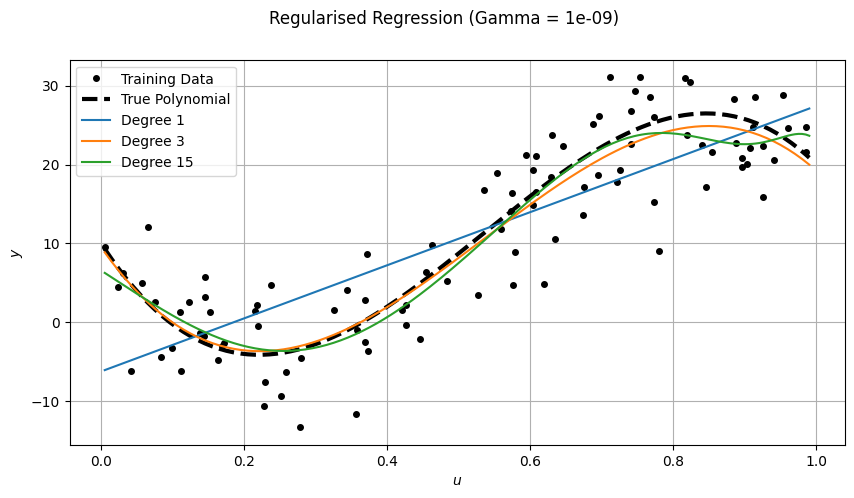

--- Unregularised Regression (Gamma = 0) ---
Degree 1: Training Loss = 46.3401, Test Loss = 48.5477
Degree 3: Training Loss = 27.3751, Test Loss = 26.5934
Degree 15: Training Loss = 25.6184, Test Loss = 28.4274

--- Regularised Regression (Gamma = 0.000000001) ---
Degree 1: Training Loss = 46.3401, Test Loss = 48.5477
Degree 3: Training Loss = 27.3751, Test Loss = 26.5934
Degree 15: Training Loss = 26.0343, Test Loss = 28.1224


In [ ]:
# Initialize dictionaries to store results
X = {}
betahat_unregularized = {}
betahat_regularized = {}

# Set gamma for regularization
gamma_reg = 0.000000001
ps = [1, 3, 15]

# Train the model for each degree
for p in ps:
   X[p] = model_matrix(p, u)
   
   # Call ridge_train twice: one for unregularized and one for regularized
   betahat_unregularized[p] = ridge_train(X[p], y, 0) # gamma = 0 for unregularized
   betahat_regularized[p] = ridge_train(X[p], y, n * gamma_reg)

# Function to test coefficients
def test_coefficients(n, betahat, X, y):
    y_hat = X @ betahat
    loss = (norm(y - y_hat)**2/n)
    return loss

# Generate test data
u_test, y_test = generate_data(3, beta, sig, n)
X_test = {}
training_loss_unreg = {}
test_loss_unreg = {}
training_loss_reg = {}
test_loss_reg = {}

# Calculate loss for training and test data
for p in ps:
    X_test[p] = model_matrix(p, u_test)
    
    # Loss for unregularised model
    training_loss_unreg[p] = test_coefficients(n, betahat_unregularized[p], X[p], y)
    test_loss_unreg[p] = test_coefficients(n, betahat_unregularized[p], X_test[p], y_test)
    
    # Loss for regularised model
    training_loss_reg[p] = test_coefficients(n, betahat_regularized[p], X[p], y)
    test_loss_reg[p] = test_coefficients(n, betahat_regularized[p], X_test[p], y_test)

# --- PLOTTING PART ---
# Create two separate figures to display the results clearly
plt.figure(figsize=(10, 5))
plt.suptitle('Unregularised Regression (Gamma = 0)')
plt.plot(u, y, 'k.', markersize=8, label='Training Data')
xx = np.arange(np.min(u), np.max(u) + 5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plt.plot(xx, yy, 'k--', linewidth=3, label='True Polynomial')
for p in ps:
    yy = np.polyval(np.flip(betahat_unregularized[p]), xx)
    plt.plot(xx, yy, label=f'Degree {p}')
plt.xlabel(r'$u$')
plt.ylabel(r'$y$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.suptitle(f'Regularised Regression (ridge) (Gamma = {gamma_reg})')
plt.plot(u, y, 'k.', markersize=8, label='Training Data')
yy = np.polyval(np.flip(beta), xx)
plt.plot(xx, yy, 'k--', linewidth=3, label='True Polynomial')
for p in ps:
    yy = np.polyval(np.flip(betahat_regularized[p]), xx)
    plt.plot(xx, yy, label=f'Degree {p}')
plt.xlabel(r'$u$')
plt.ylabel(r'$y$')
plt.legend()
plt.grid(True)
plt.show()

# Display the numerical results
print("--- Unregularised Regression (Gamma = 0) ---")
for p in ps:
    print(f"Degree {p}: Training Loss = {training_loss_unreg[p]:.4f}, Test Loss = {test_loss_unreg[p]:.4f}")

print("\n--- Regularised Regression (ridge) (Gamma = 0.000000001) ---")
for p in ps:
    print(f"Degree {p}: Training Loss = {training_loss_reg[p]:.4f}, Test Loss = {test_loss_reg[p]:.4f}")
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Question 2.2
From the two experimental results above, I generated a model with unrealized regression (gamma = 0), it can be seen that at very high polynomial degrees, the curve appears to be trying to overfit the dataset, whereas with ridge regression, even with high polynomial degrees, the curve remains smooth, because there is a mechanism to penalize high errors. From several experiments, I saw a fairly good gamma value at gamma = 0.000000001 (very small) which still provides a curve shape that follows the shape of the data without being too detailed or too generalized at high polynomial degrees. I also noticed, with unregularized regression, at high polynomial degrees, the training loss is lower, but the test loss is higher compared to regularized regression.

## Question 2.3 
For predicting the outlier distribution, without a mechanism like ridge regression, with a high degree of polynomial, the generated curve will attempt to overfit the data. This will severely distort the shape of the curve (and function) of the resulting model. Unlike ridge regression, the presence of outliers is penalized, so the shape of the curve and the function of the generated model remain controlled.